🎯 Desafio dia 93 — Acesso a Serviços Públicos

📂 Dataset: desafio_dia_93_servicos_publicos.csv
📥 Clique aqui para baixar o CSV

🔍 Contexto: Uma prefeitura deseja entender como diferentes bairros e perfis de cidadãos avaliam os serviços públicos disponíveis, como saúde, educação, transporte, segurança e lazer.

🛠️ Tarefas do desafio
🧹 Tratamento de dados

- Preencha os valores ausentes em avaliacao_servico com a moda por serviço acessado (groupby().transform('mode') com .fillna()).

📊 Análise geral

- Qual serviço tem a pior avaliação média geral?

- Qual bairro apresenta as avaliações mais altas em serviços de transporte?

📈 Visualização de dados

- Crie um gráfico de barras agrupadas com a média de avaliação por servico_acessado, separado por bairro.

🤖 Machine Learning - Classificação leve

- Crie uma nova coluna binária avaliacao_alta (1 para notas 4 ou 5, 0 para as demais).

- Treine um modelo de LogisticRegression para prever avaliacao_alta com base em:

        bairro, genero, idade, servico_acessado

    Use:

        get_dummies, train_test_split, LogisticRegression

        Avalie com confusion_matrix e classification_report.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("desafio_dia_93_servicos_publicos.csv")
df.head()

,id_cidadao,bairro,genero,idade,servico_acessado,avaliacao_servico
0,9000,Zona Leste,Masculino,28,Segurança,5.0
1,9001,Zona Oeste,Feminino,36,Transporte,5.0
2,9002,Centro,Outro,53,Segurança,5.0
3,9003,Zona Norte,Masculino,50,Transporte,5.0
4,9004,Centro,Feminino,54,Transporte,2.0


In [7]:
#Preencha os valores ausentes em avaliacao_servico com a moda por serviço acessado.
df["avaliacao_servico"] = df["avaliacao_servico"].fillna(
    df.groupby("servico_acessado")["avaliacao_servico"].transform(lambda x: x.mode()[0])
)
df["avaliacao_servico"].isna().sum()

np.int64(0)

In [10]:
#Qual serviço tem a pior avaliação média geral?
servico_avaliacao = df.groupby("servico_acessado")["avaliacao_servico"].mean().sort_values()
print(servico_avaliacao)

servico_acessado
Saúde         3.250000
Lazer         3.315217
Transporte    3.403670
Educação      3.494737
Segurança     3.510417
Name: avaliacao_servico, dtype: float64


In [13]:
#Qual bairro apresenta as avaliações mais altas em serviços de transporte?
servico_transporte = df[df["servico_acessado"] == "Transporte"]
avaliacao_transporte = servico_transporte.groupby("bairro")["avaliacao_servico"].mean().sort_values(ascending=False)
print(avaliacao_transporte)

bairro
Zona Norte    3.708333
Zona Sul      3.588235
Zona Oeste    3.450000
Zona Leste    3.380952
Centro        3.000000
Name: avaliacao_servico, dtype: float64


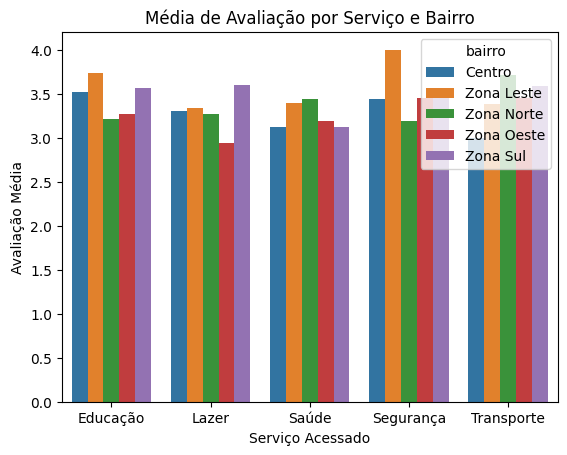

In [21]:
#Crie um gráfico de barras agrupadas com a média de avaliação por servico_acessado, separado por bairro.
media_avaliacao = df.groupby(["servico_acessado", "bairro"])["avaliacao_servico"].mean().reset_index()

sns.barplot(data=media_avaliacao, x="servico_acessado", y="avaliacao_servico", hue="bairro")
plt.title("Média de Avaliação por Serviço e Bairro")
plt.ylabel("Avaliação Média")
plt.xlabel("Serviço Acessado")
plt.show()

In [22]:
#Crie uma nova coluna binária avaliacao_alta (1 para notas 4 ou 5, 0 para as demais).
df["avaliacao_alta"] = df["avaliacao_servico"].isin([4, 5]).astype(int)

#Treine um modelo de LogisticRegression para prever avaliacao_alta com base em:
X = df[["bairro", "genero", "idade", "servico_acessado"]]
y = df["avaliacao_alta"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[51 26]
 [46 27]]
              precision    recall  f1-score   support

           0       0.53      0.66      0.59        77
           1       0.51      0.37      0.43        73

    accuracy                           0.52       150
   macro avg       0.52      0.52      0.51       150
weighted avg       0.52      0.52      0.51       150

